<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 34.5MB/s]


In [ ]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.describe()

,Sales
count,198.000000
mean,10842.757576
std,2605.006293
min,108.000000
25%,8856.000000
50%,10745.000000
75%,12399.750000
max,23740.000000


In [ ]:
mobile_sales['DATE'].describe()

<ipython-input-6-b0dfb751000a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales['DATE'].describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [ ]:
# 2001 -> 12
# 2002 -> 12
18*12 + 1

217

In [ ]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [ ]:
mobile_sales.set_index('DATE', inplace=True)

In [ ]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


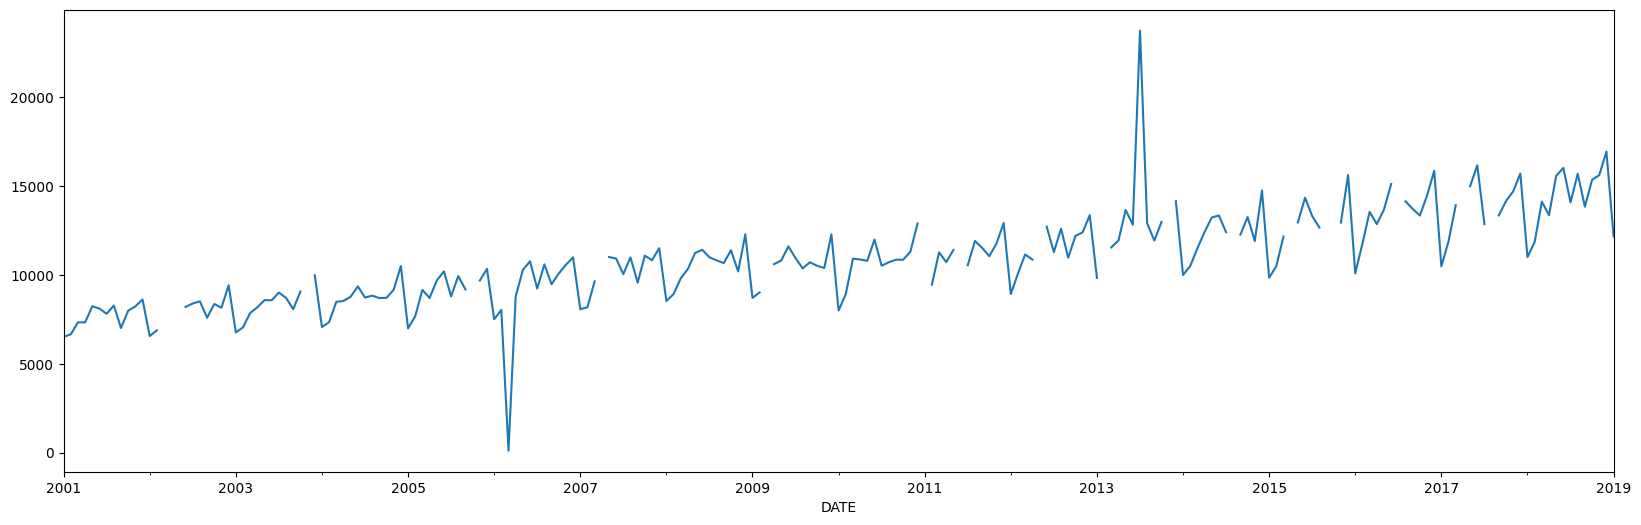

In [ ]:
mobile_sales['Sales'].plot();

In [ ]:
mobile_sales['Sales'].mean()

10842.757575757576

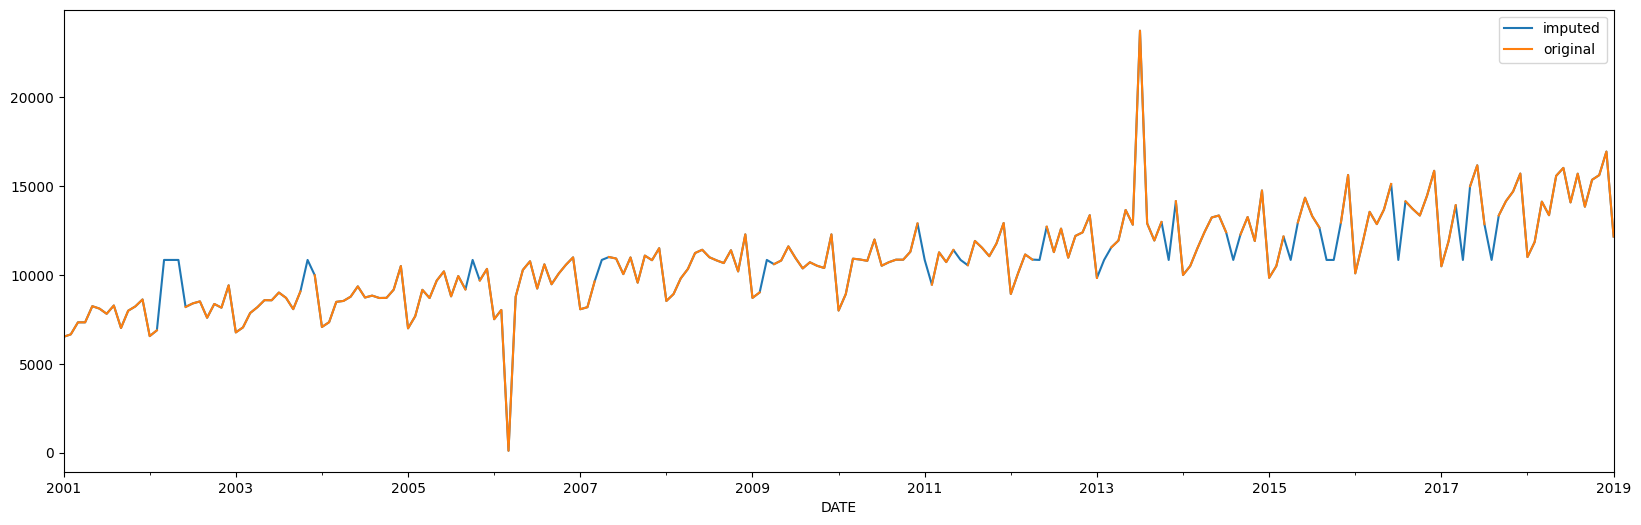

In [ ]:
mobile_sales.Sales.fillna( mobile_sales.Sales.mean() ).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

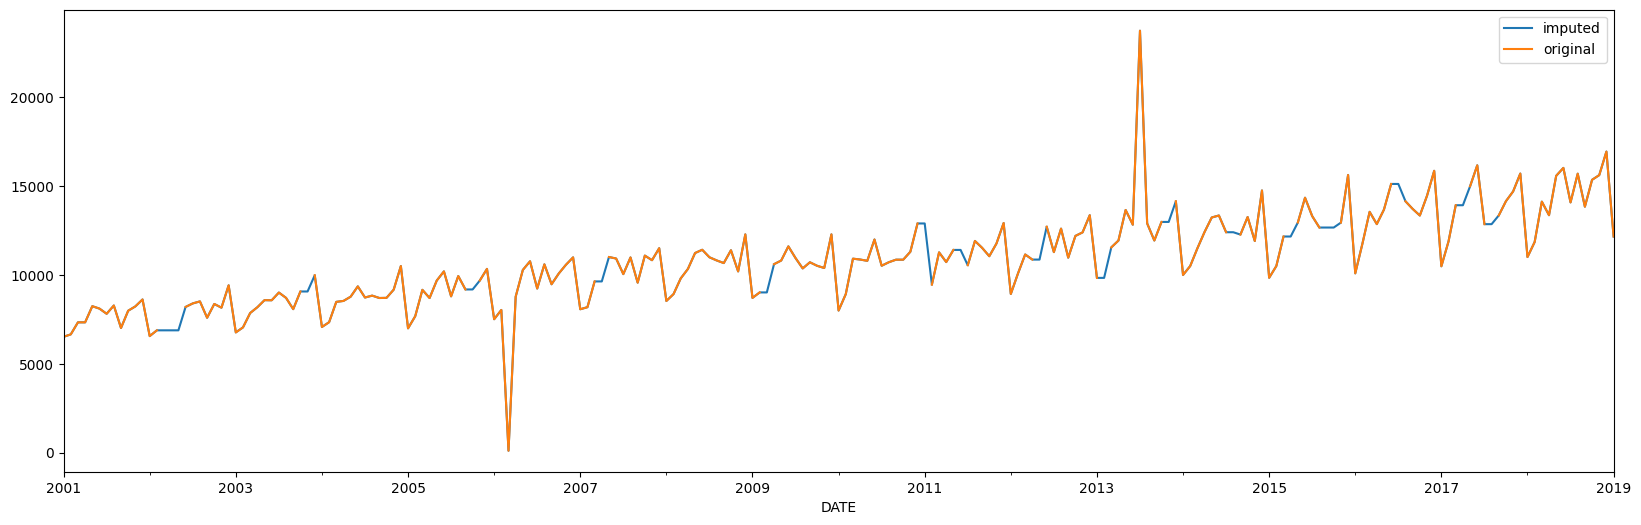

In [ ]:
mobile_sales.Sales.fillna( method='ffill').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

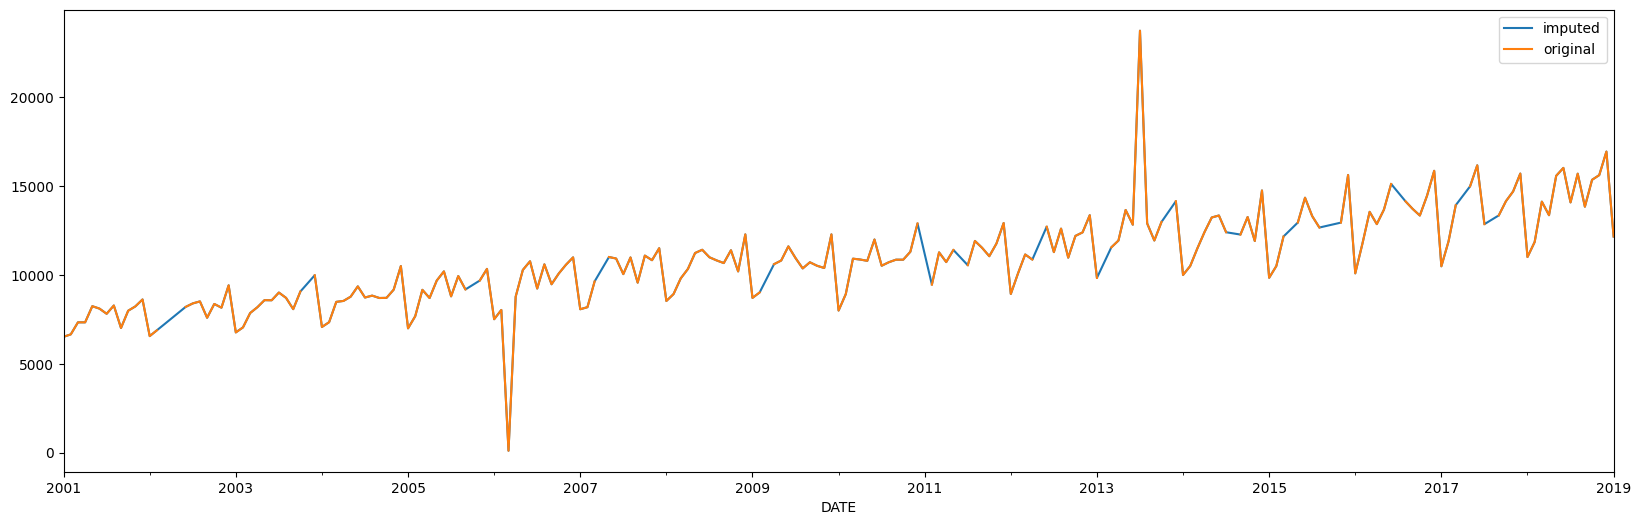

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend();


In [ ]:
mobile_sales['Sales'] = mobile_sales.Sales.interpolate(method='linear')

In [ ]:
mobile_sales.isna().sum()

Sales    0
dtype: int64

[]

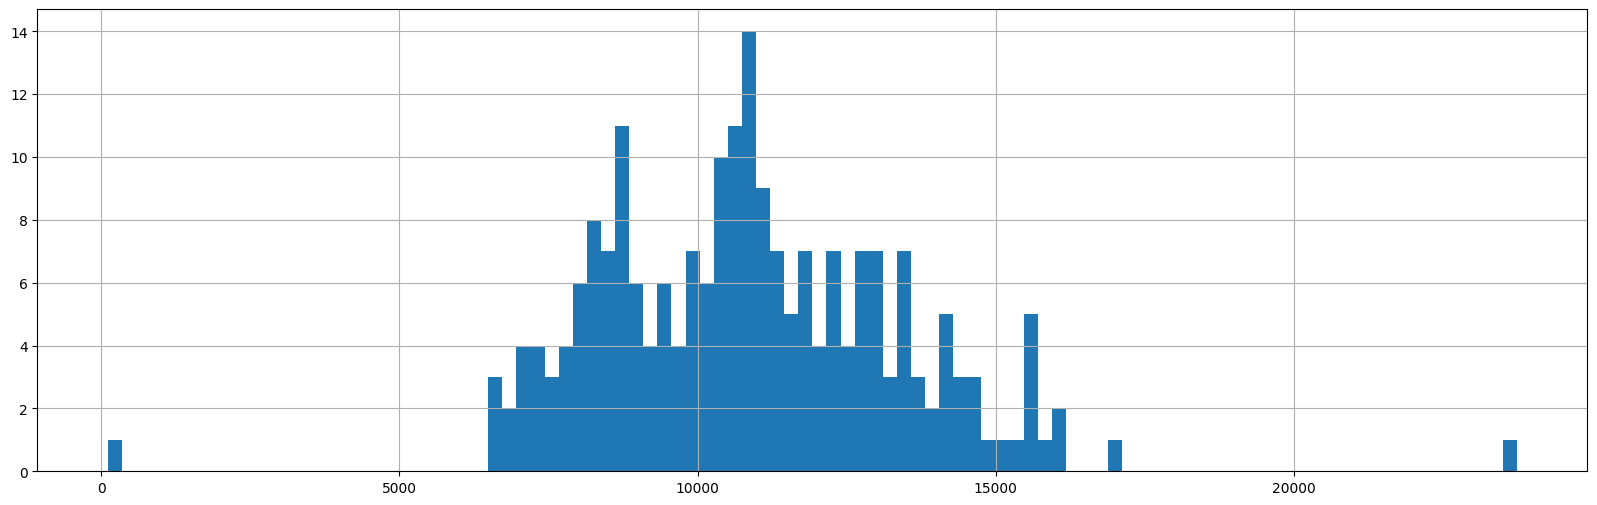

In [ ]:
mobile_sales.Sales.hist(bins = 100).plot()

In [ ]:
mobile_sales.Sales.quantile(0.995)

16879.15999999999

In [ ]:
mobile_sales.Sales.quantile(0.005)

6522.12

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005))

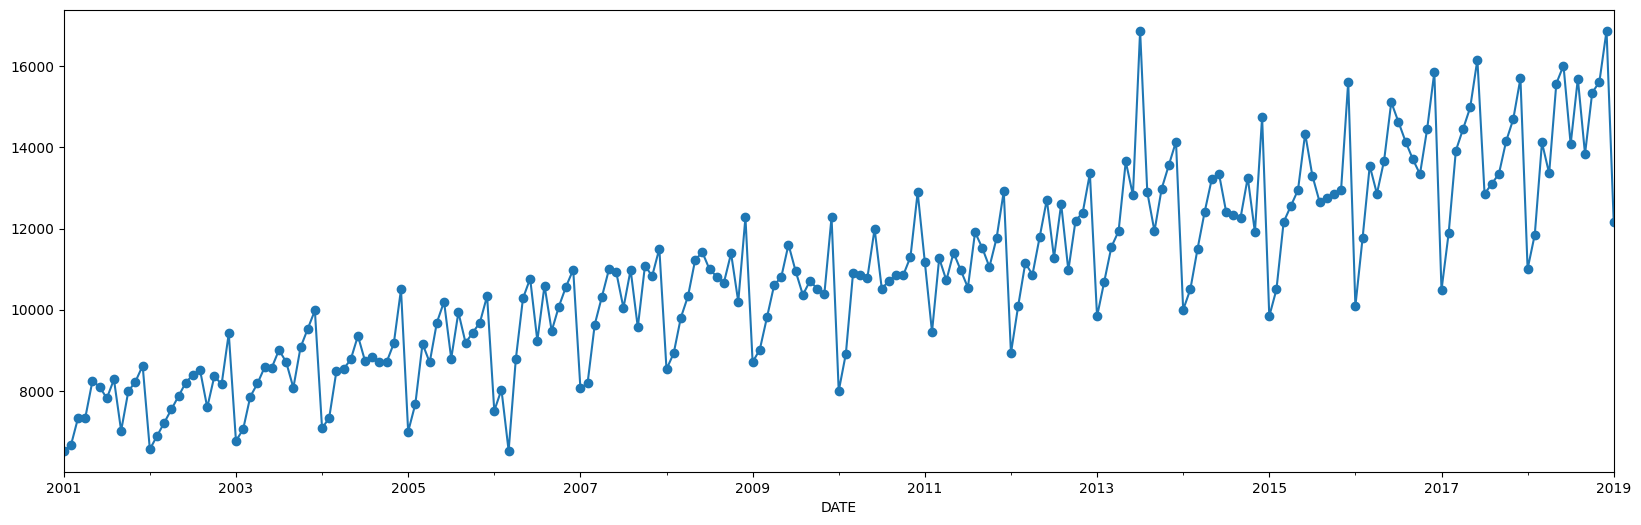

In [ ]:
mobile_sales.Sales.plot(style="-o");

In [ ]:
pd.Series([1, 5, 2, 7, 10, 14, 20, 43]).clip(upper = 25, lower = 3)

0     3
1     5
2     3
3     7
4    10
5    14
6    20
7    25
dtype: int64

In [ ]:
mobile_sales['Sales'].head(10)

DATE
2001-01-01    6522.12
2001-02-01    6654.00
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
2001-06-01    8104.00
2001-07-01    7813.00
2001-08-01    8279.00
2001-09-01    7014.00
2001-10-01    7985.00
Name: Sales, dtype: float64

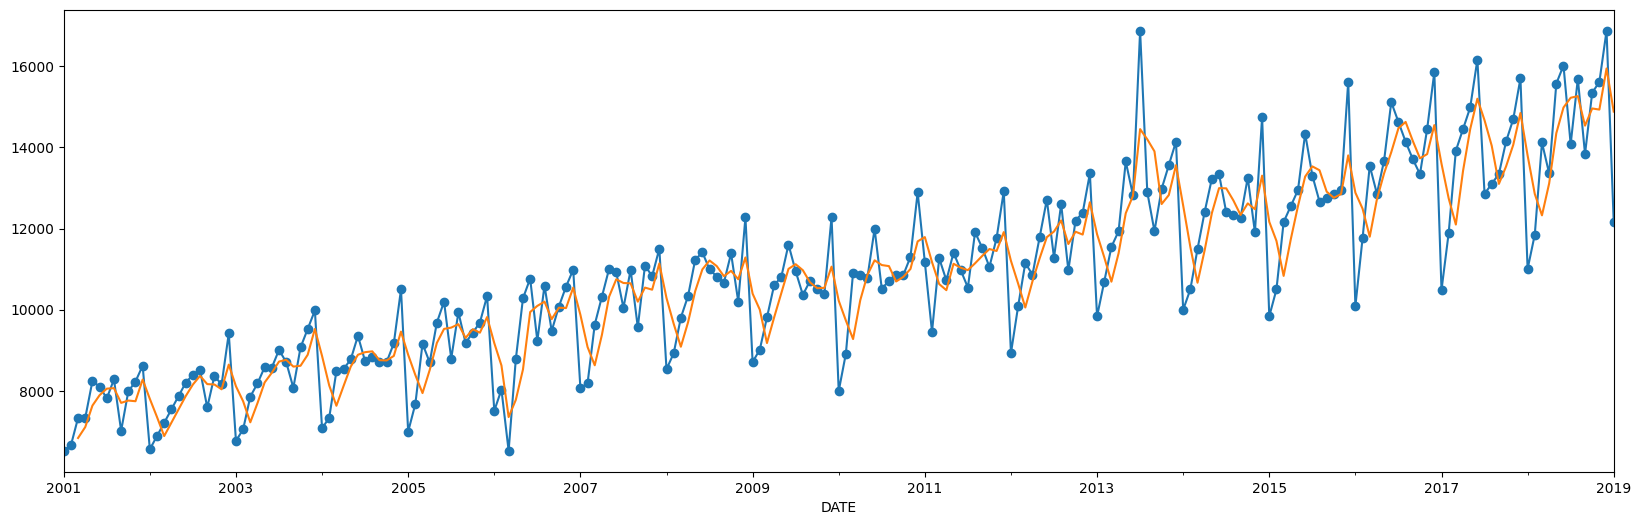

In [ ]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=3, center = False).mean().plot();

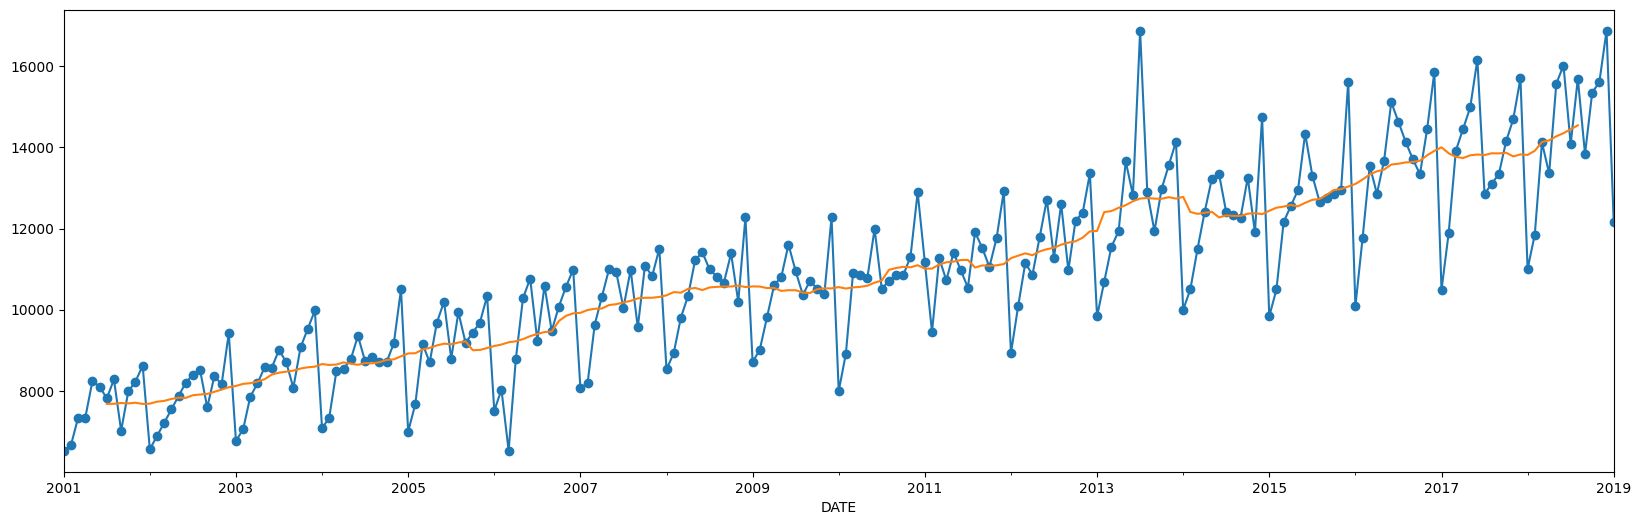

In [ ]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=12, center = True).mean().plot();

## Decomposition

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'additive')

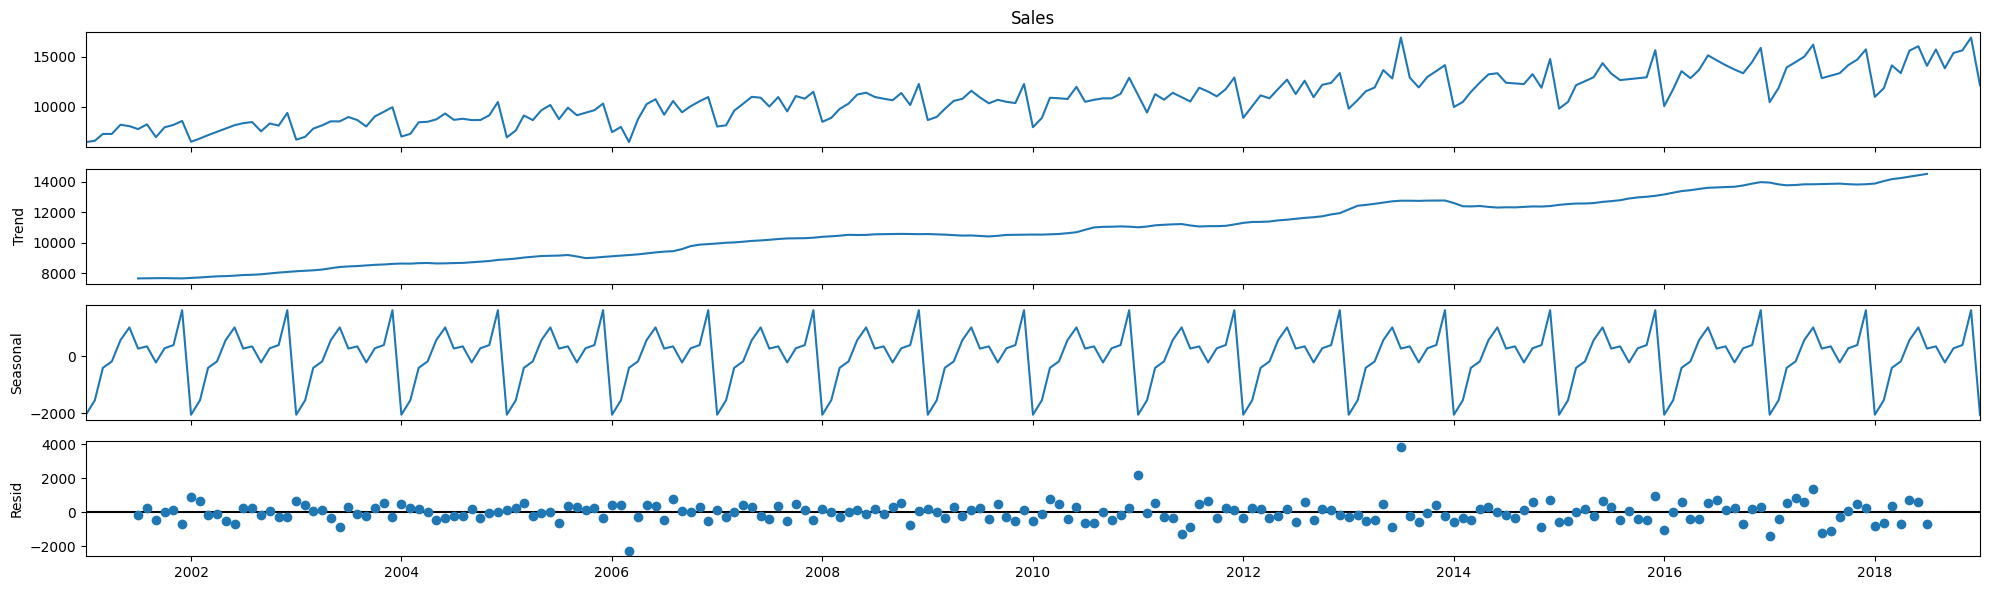

In [ ]:
model.plot();

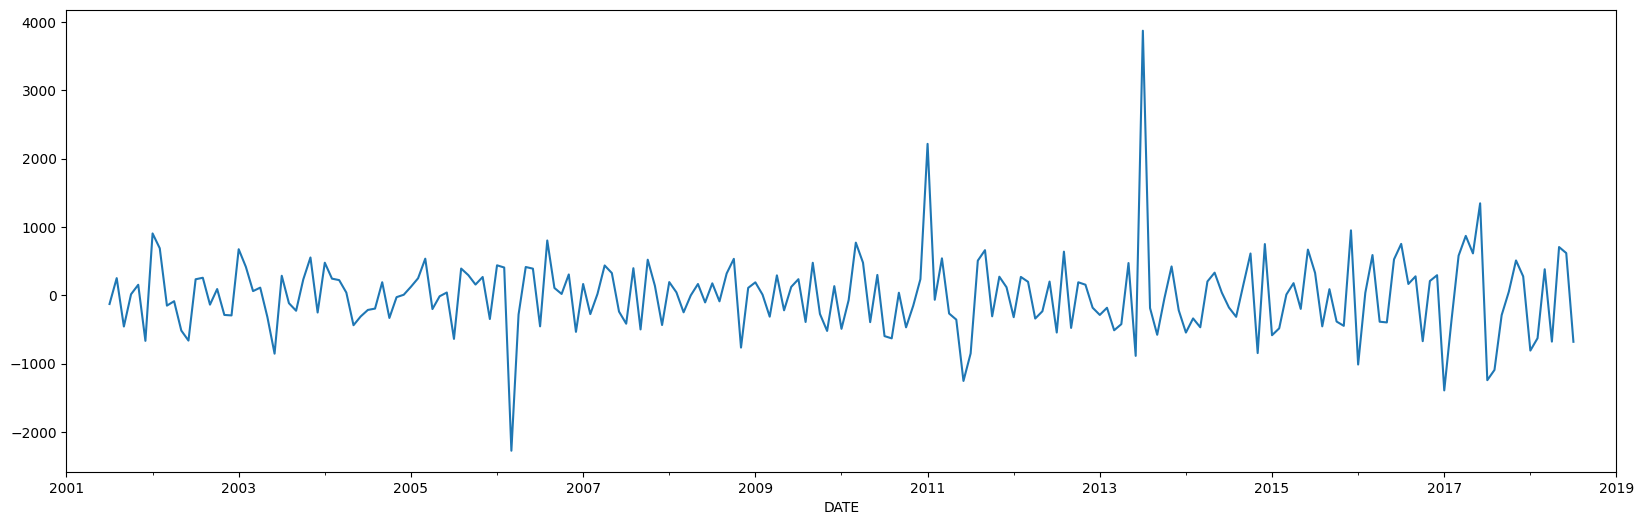

In [ ]:
model.resid.plot();

In [ ]:
mobile_sales.loc[]

In [ ]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.00
2018-03-01,14123.00
2018-04-01,13360.00
2018-05-01,15576.00
2018-06-01,16021.00
2018-07-01,14080.00
2018-08-01,15697.00
2018-09-01,13838.00
2018-10-01,15351.00


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
test_x['pred'] = train_x["Sales"].mean()

MAE : 3890.436
RMSE : 4170.094
MAPE: 0.259


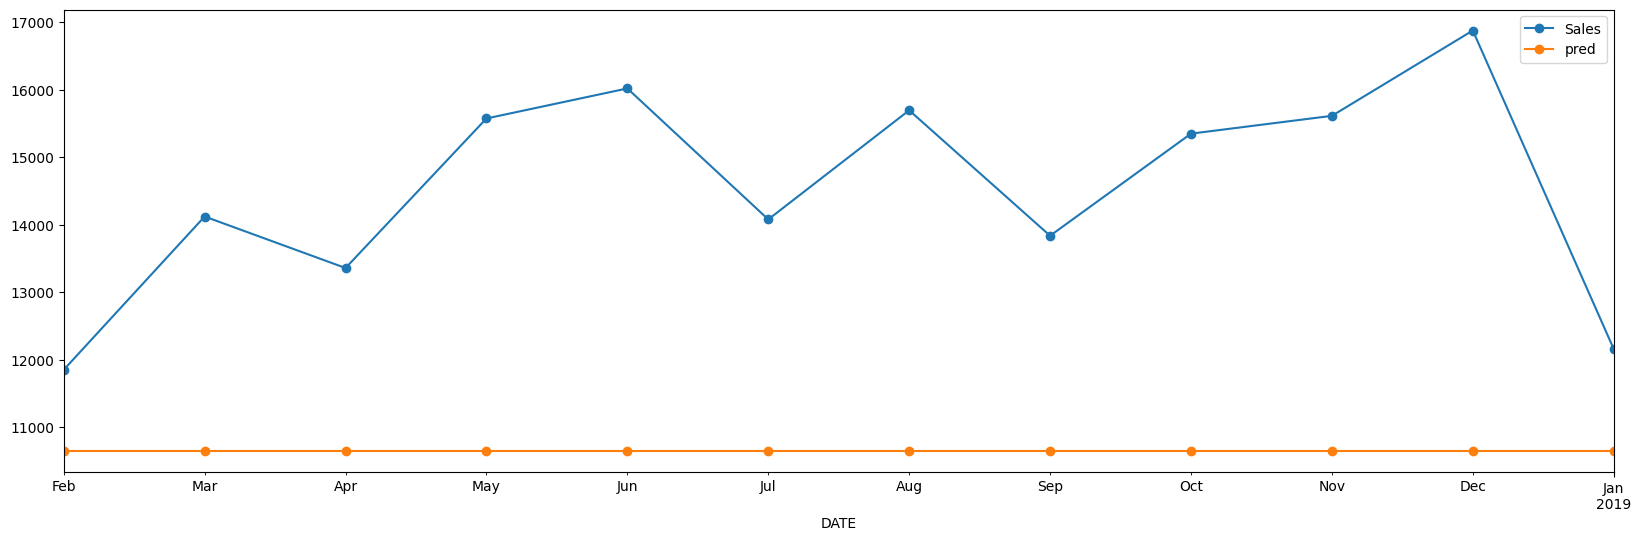

In [ ]:
test_x.plot(style= "-o")
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

MAE : 3541.013
RMSE : 3846.163
MAPE: 0.235


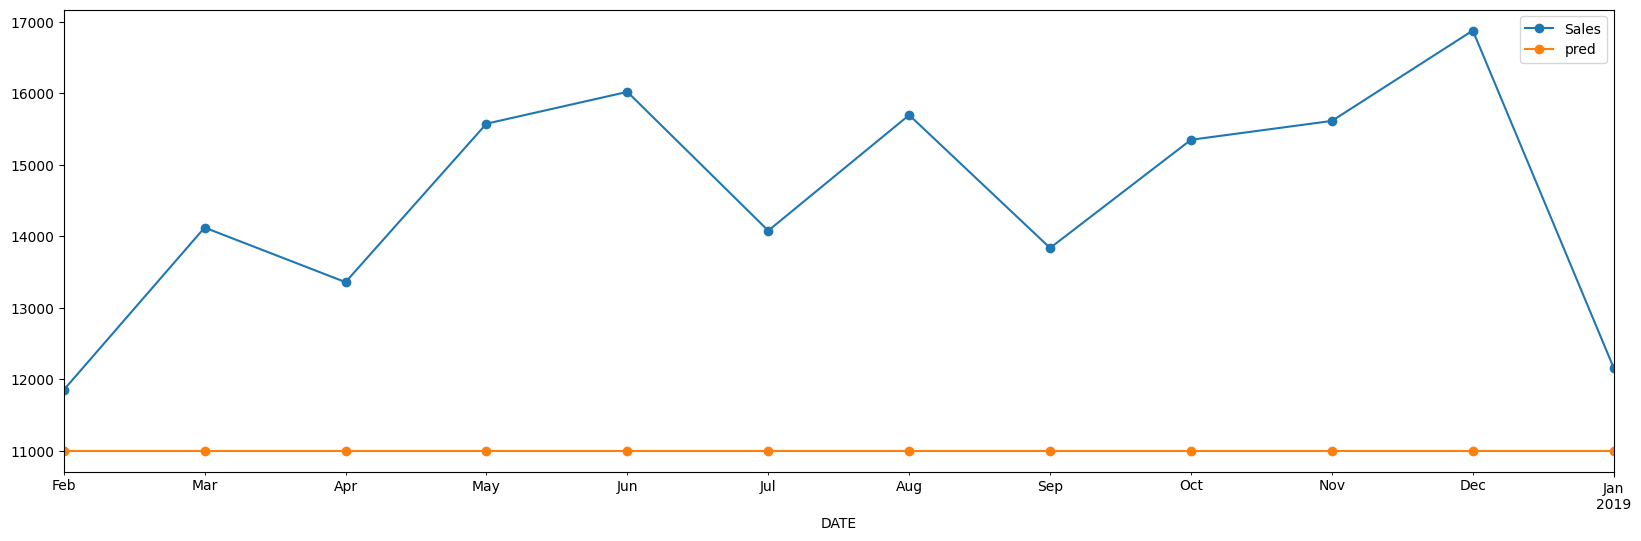

In [ ]:
test_x.plot(style= "-o")
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.00,11005.0
2018-03-01,14123.00,11005.0
2018-04-01,13360.00,11005.0
2018-05-01,15576.00,11005.0
2018-06-01,16021.00,11005.0
2018-07-01,14080.00,11005.0
2018-08-01,15697.00,11005.0
2018-09-01,13838.00,11005.0
2018-10-01,15351.00,11005.0


MAE : 902.263
RMSE : 1120.819
MAPE: 0.061


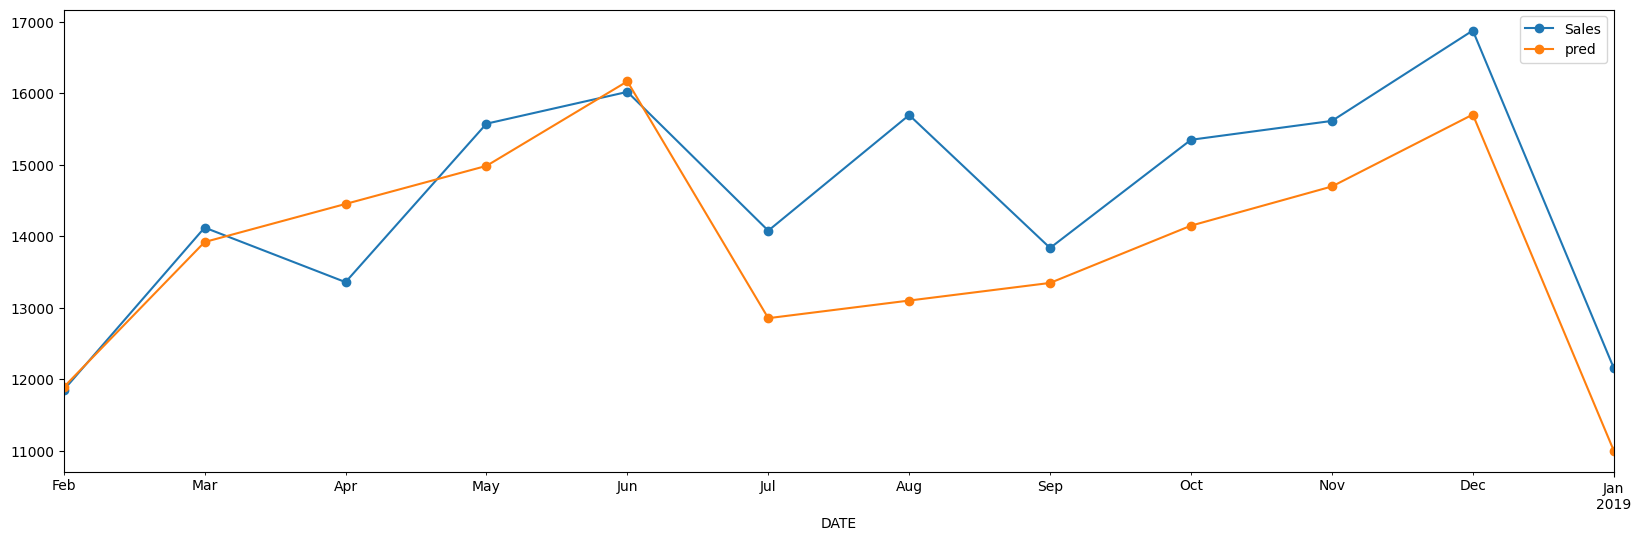

In [ ]:
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales




test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.arange(0, len(test_x))

In [ ]:
# np.arange(low, end , jump)
# np.linspace(low, end, how many points)

In [ ]:
# np.arange

In [ ]:

test_x['pred'] = y_t + h*m


MAE : 3420.741
RMSE : 3727.232
MAPE: 0.227


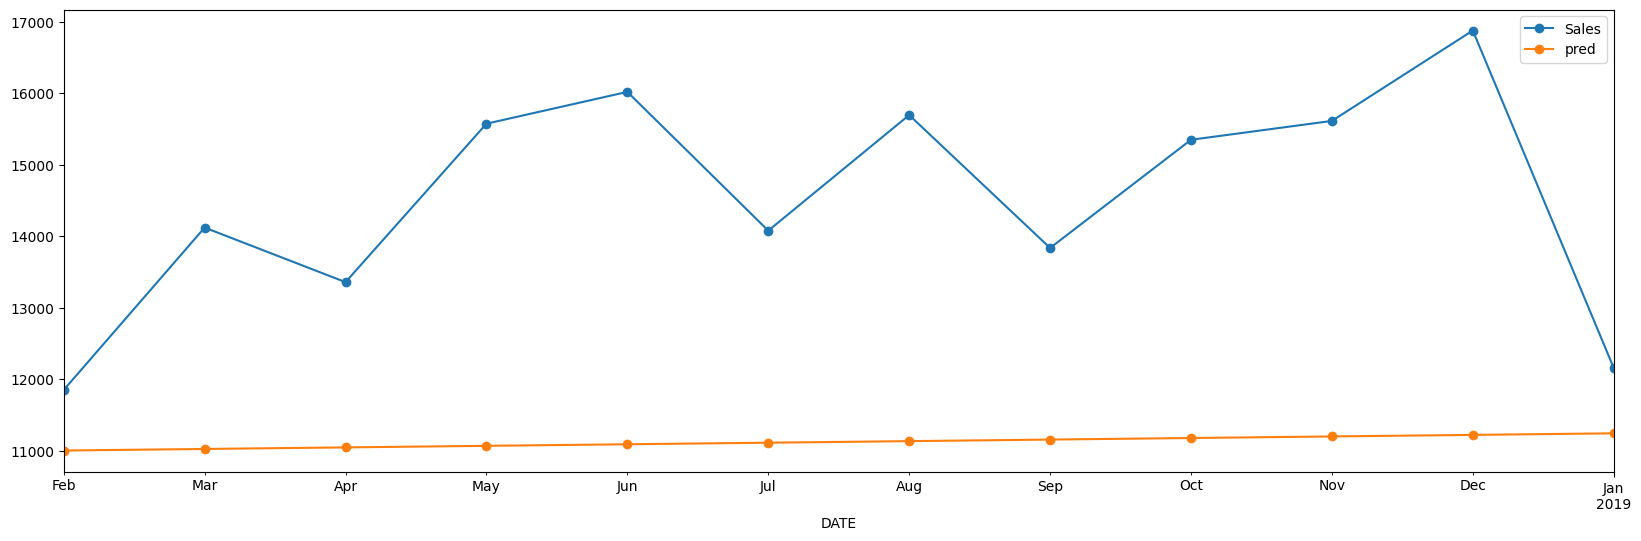

In [ ]:

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<Axes: xlabel='DATE'>

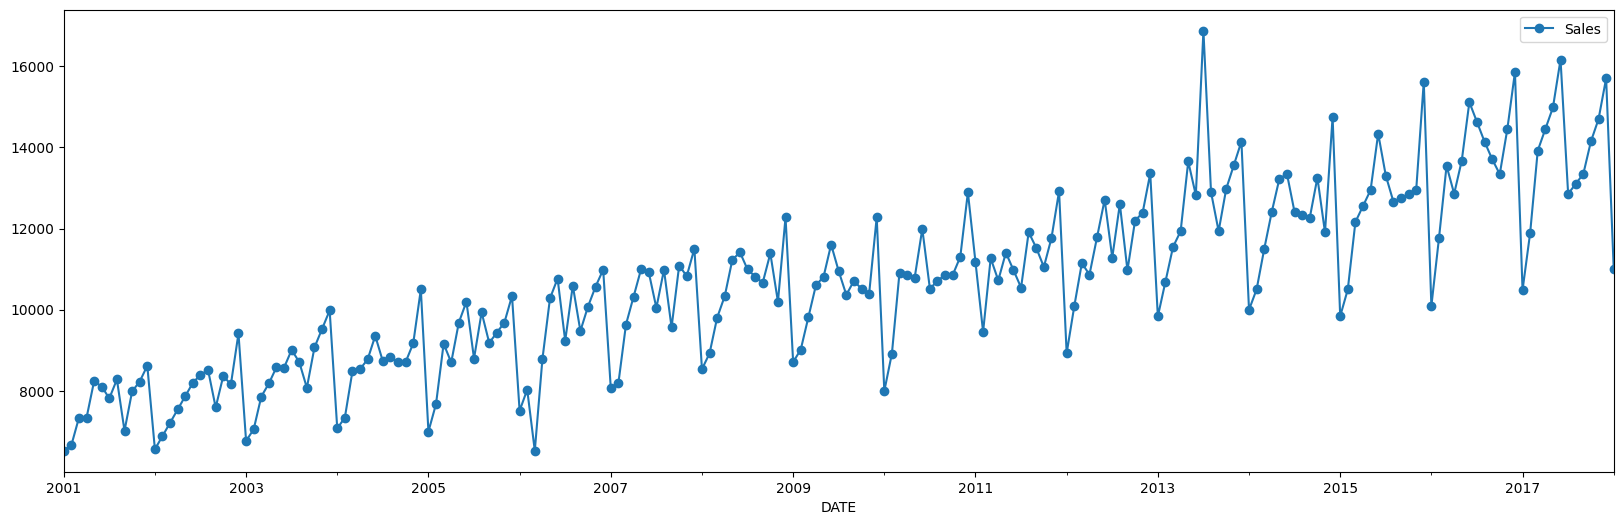

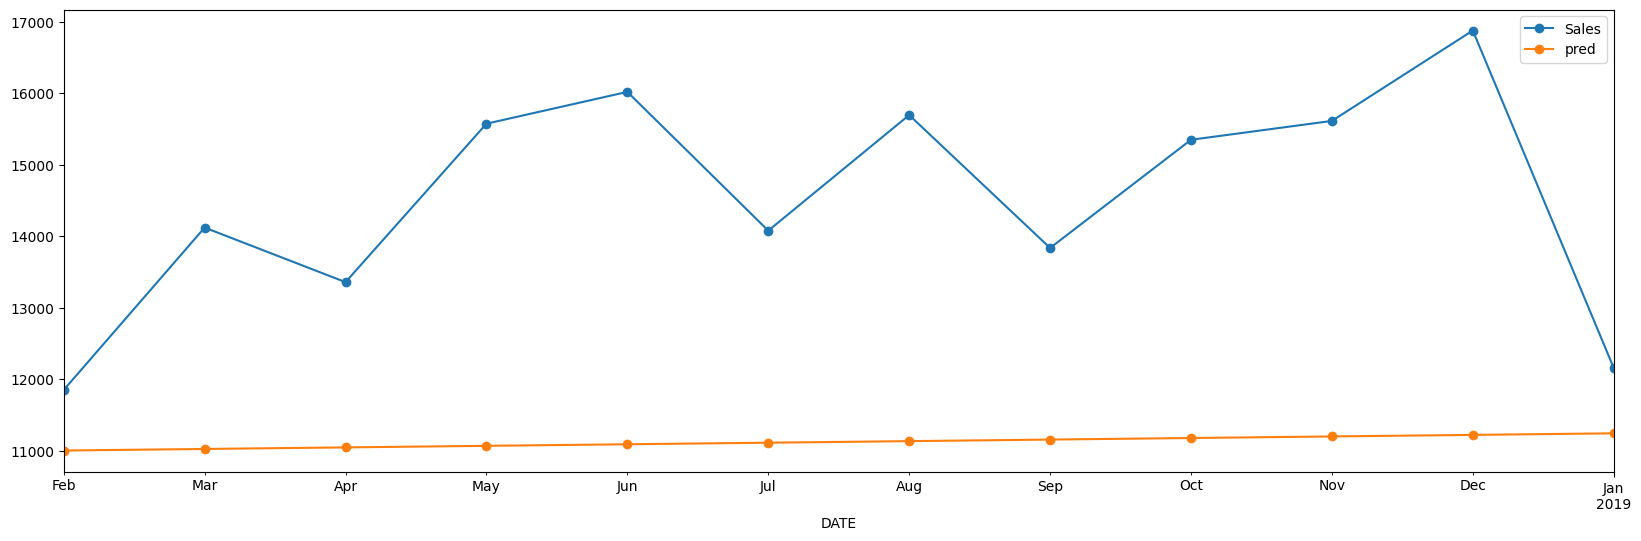

In [ ]:
train_x.plot(style='-o')
test_x.plot(style='-o')

In [ ]:
# Statement I: Naive method is capable of capturing seasonality.
# Statement II: Forecasting with mean/median value will give a flat forecast around mean/median value
# Statement III: Seasonal Naive is capable of capturing seasonality as well as trend.

## Moving Averages

In [ ]:
pred_ = train_x.Sales.dropna().copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-3:].mean())

In [ ]:
pd.Series(pred_)

0       6522.120000
1       6654.000000
2       7332.000000
3       7332.000000
4       8240.000000
           ...     
212    13184.042219
213    13175.059036
214    13195.613236
215    13184.904830
216    13185.192368
Length: 217, dtype: float64

In [ ]:
test_x['pred'] = pred_[-12:]

MAE : 1799.247
RMSE : 2043.135
MAPE: 0.12


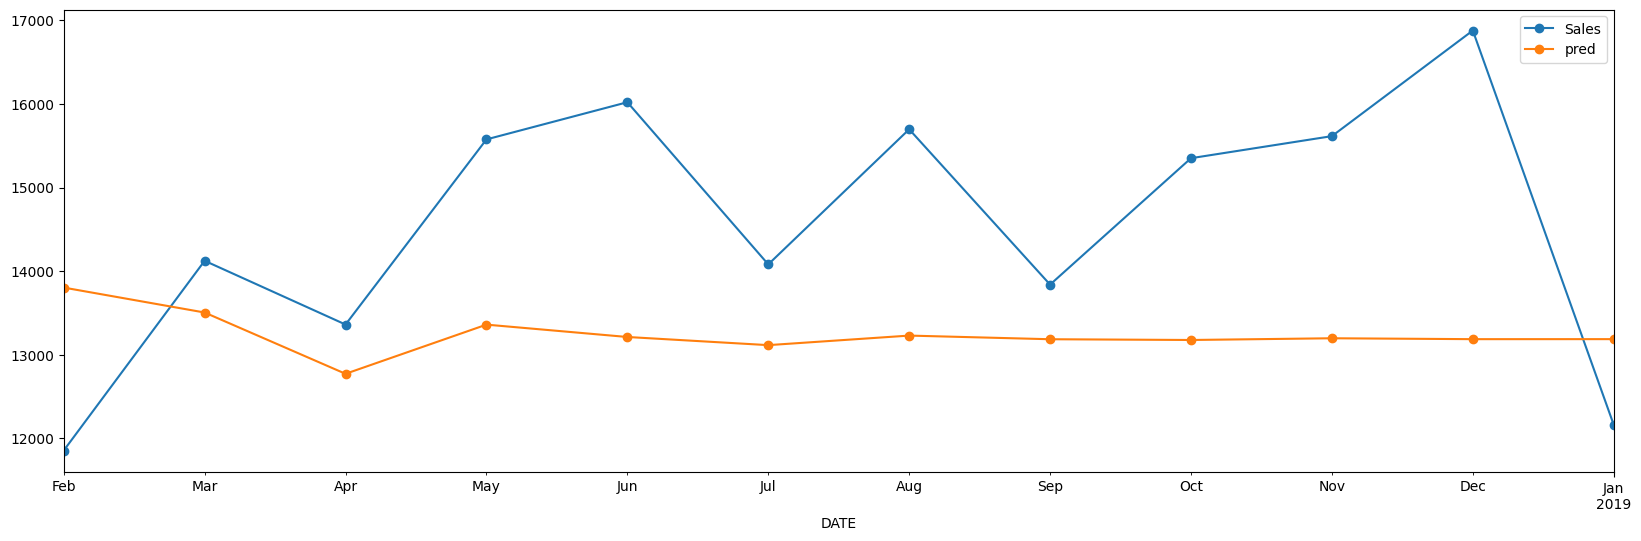

In [ ]:

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<Axes: xlabel='DATE'>

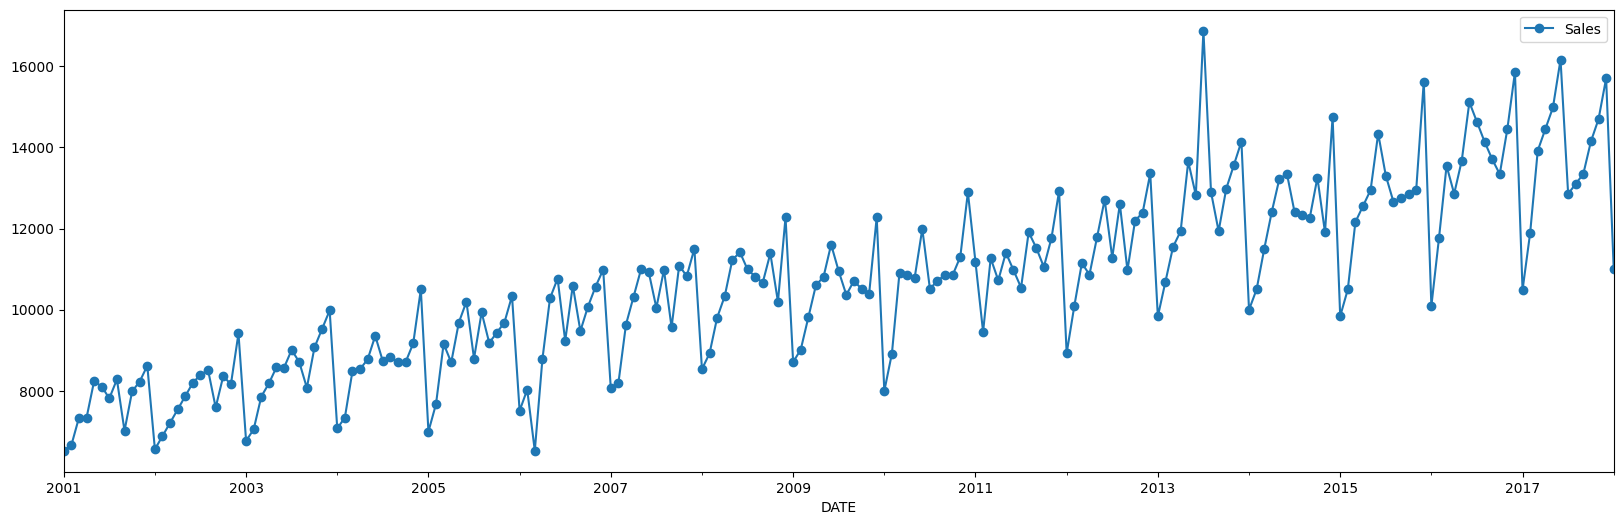

In [ ]:
train_x.plot(style="-o")

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales)
_ = model.fit(smoothing_level = 0.2)
_.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6522.120000
2001-02-01     6522.120000
2001-03-01     6548.496000
2001-04-01     6705.196800
2001-05-01     6830.557440
                  ...     
2018-09-01    14545.725040
2018-10-01    14404.180032
2018-11-01    14593.544025
2018-12-01    14797.835220
2019-01-01    15214.100176
Length: 217, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


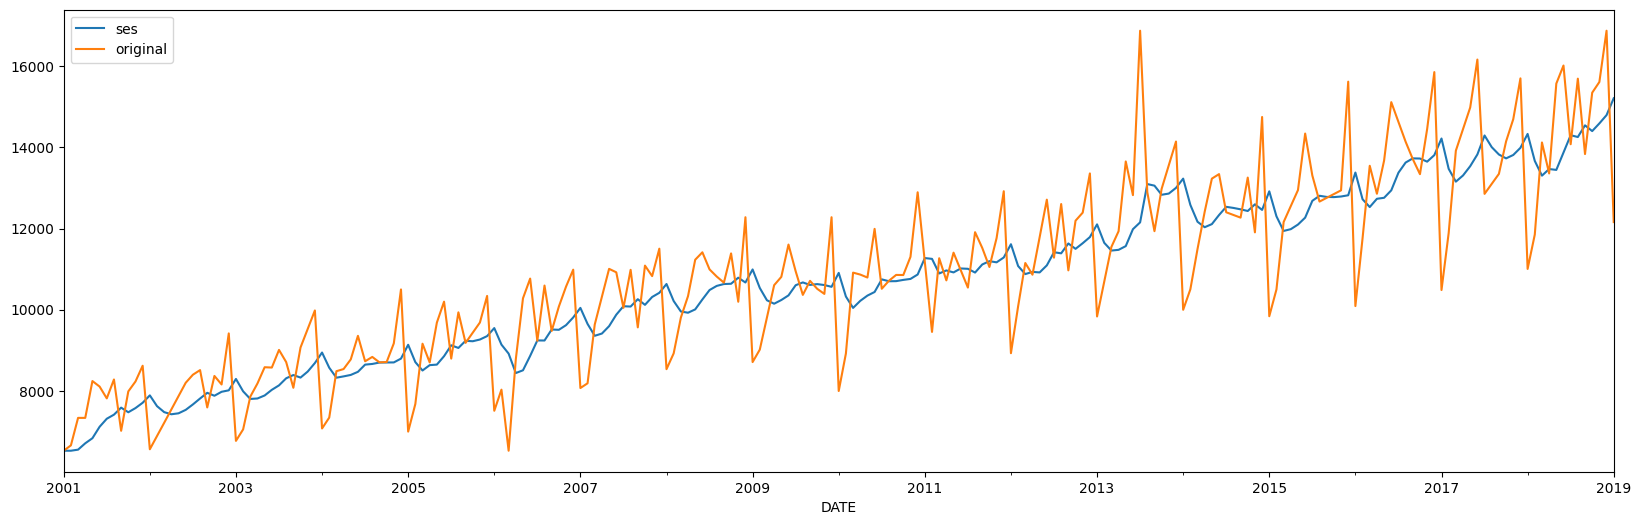

In [ ]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2).fittedvalues)

pred.plot(label='ses')
mobile_sales.Sales.plot(label='original')

plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


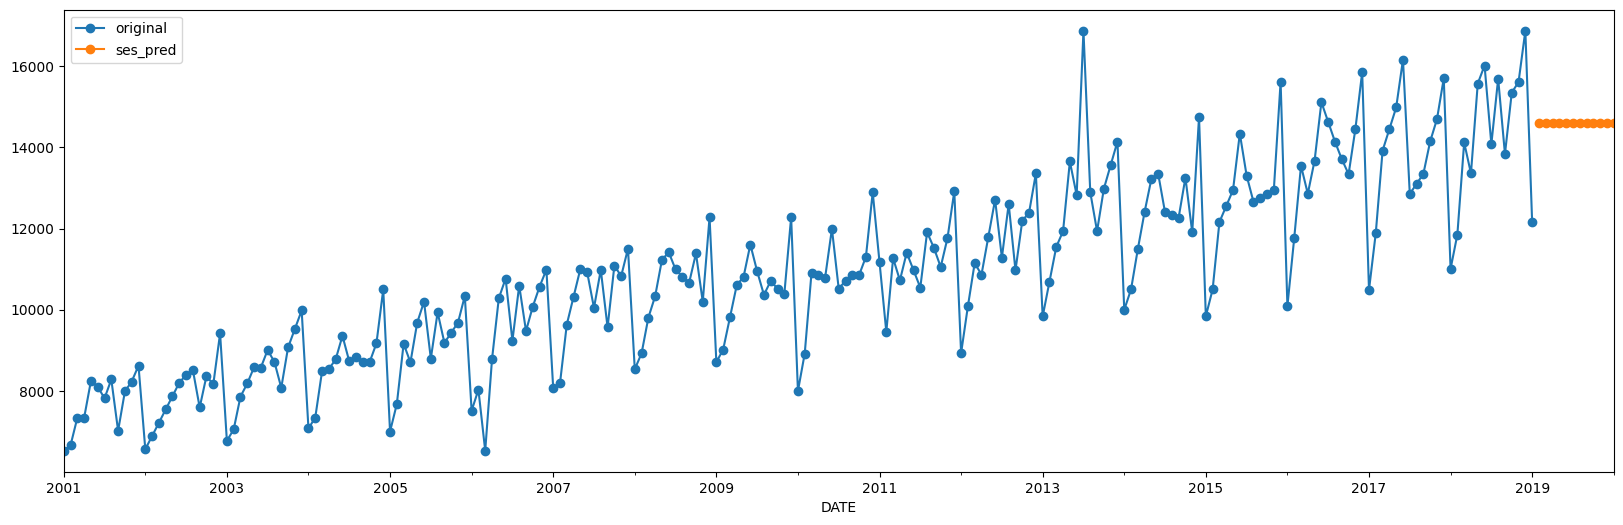

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2)
pred = model.forecast(12)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()